In [ ]:
INDKP105

In [76]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`


import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
#from matplotlib_venn import venn2 # 

## Import data from Denmark Statistics


In [77]:
dst = pydst.Dst(lang='en')
dst.get_subjects()

tables = dst.get_tables(subjects=['04'])
tables[tables.id == 'INDKP107']
indk_vars = dst.get_variables(table_id='INDKP107')
indk_vars

inc = dst.get_data(table_id = 'INDKP107', variables= {'OMRÅDE':['*'], 'TID':['*']})
empl = dst.get_data(table_id = 'RAS200', variables={'OMRÅDE':['*'], 'TID':['*'], 'HERKOMST':['*']})


In [ ]:
empl.head()


In [78]:
inc.head() 

,OMRÅDE,TID,ENHED,KOEN,UDDNIV,INDKOMSTTYPE,INDHOLD
0,Region Syddanmark,2013,People with type of income (number),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),333728
1,Copenhagen,2013,People with type of income (number),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),96688
2,Frederiksberg,2013,People with type of income (number),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),14135
3,Dragør,2013,People with type of income (number),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),2698
4,Tårnby,2013,People with type of income (number),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),10665


In [79]:
#Renaming 
columns_dict_empl = {}
columns_dict_empl['OMRÅDE'] = 'area'
columns_dict_empl['TID'] = 'year'
columns_dict_empl['HERKOMST'] = 'origin'
columns_dict_empl['INDHOLD'] = 'emp'

columns_dict_inc = {}
columns_dict_inc['OMRÅDE'] = 'area'
columns_dict_inc['TID'] = 'year'
columns_dict_inc['INDHOLD'] = 'income'
columns_dict_inc['UDDNIV'] = 'educ'

empl.rename(columns=columns_dict_empl,inplace=True)
inc.rename(columns=columns_dict_inc,inplace=True)

#income
##Disposable income of eductionlevel 10 Basic school.
I = inc.area.str.contains('Region')
inc =  inc.loc[I,['area','year','income']]
inc.head(10)

#Employmentrate total
I = empl.area.str.contains('Region')
#I| = empl.origin.str.contains('Total')
empl=  empl.loc[I,['area','year','origin','emp']]
empl_copy =empl



In [80]:
#From this data I would like to take out two different employment rates. However I cannot get it right unless I do it in three steps:

#Step 1: Get the total employment rate
I= empl.origin.str.contains('Total')
empl=  empl.loc[I,['area','year','emp']]
#empl.rename(columns ={'emp':'emp_total'}, inplace=True)
# empl.head()

#Step 2: From the copy of empl I make the employmentrate for decendents of non-western immigrants.
L = empl_copy.origin.str.contains('Descendants from non-western countries')
empl_copy=  empl_copy.loc[L,['area','year','emp']]
empl_copy.rename(columns ={'emp':'emp_nw'}, inplace=True)

#Step 3 Merge the two sets
empl_true = pd.merge(empl, empl_copy, on=['area','year'], how='left')

In [81]:
#Finally merge the incomedata set to the employment data.
#Looking into the data, which differs interms of range of years
print(f'Years in empl_true: {empl_true.year.unique()}')
print(f'Years in inc: {inc.year.unique()}')

#Finding the differences
diff_y = [y for y in inc.year.unique() if y not in empl_true.year.unique()] 
print(f'years in income data, but not in the employment data: {diff_y}')

#Merging
data = pd.merge(empl_true, inc, on=['area','year'], how='left')
data_true = data.sort_values(['area','year'])

Years in empl_true: [2011 2012 2013 2014 2008 2009 2010 2015 2016 2017 2018]
Years in inc: [2013 2012 2011 2010 2009 2008 2006 2005 2004 2014 2015 2007 2016 2017
 2018]
years in income data, but not in the employment data: [2006, 2005, 2004, 2007]


In [82]:
#The final dataset
data_true.head(50)

,area,year,emp,emp_nw,income
26,Region Hovedstaden,2008,75.8,65.7,364602
27,Region Hovedstaden,2009,73.3,59.7,365103
28,Region Hovedstaden,2010,72.6,57.3,362343
12,Region Hovedstaden,2011,72.5,56.2,358672
13,Region Hovedstaden,2012,72.2,55.0,355150
14,Region Hovedstaden,2013,72.3,55.5,350303
15,Region Hovedstaden,2014,72.5,55.6,344765
38,Region Hovedstaden,2015,73.2,57.7,338118
40,Region Hovedstaden,2016,73.8,58.7,337449
48,Region Hovedstaden,2017,74.4,60.5,333179


In [83]:
#Plain desriptive statistics
data_true.describe()
#Mean
data_true.groupby('area')['emp'].apply(lambda x: x.mean()).head()
data_true.groupby('area')['emp_nw'].apply(lambda x: x.mean()).head()
data_true.groupby('area')['income'].apply(lambda x: x.mean()).head()
# print (f'The income mean across all regions is {data.income.mean()}')
# print (f'The employment rate mean across all regions is {data.emp.mean()}')
# print (f'The mean employment rate amongst decendents of non-western immigrants across all regions is {data.emp_nw.mean()}')

area
Region Hovedstaden    348898.909091
Region Midtjylland    320428.818182
Region Nordjylland    165924.545455
Region Sjælland       227309.727273
Region Syddanmark     333251.000000
Name: income, dtype: float64

In [84]:
import ipywidgets as widgets
def plot_data_true(df, area): 
    I = df['area'] == area
    ax=df.loc[I,:].plot(x='year', y={'emp_nw','emp'}, style='-o', legend=False)

In [85]:
widgets.interact(plot_data_true, 
    df = widgets.fixed(data_true),
    area = widgets.Dropdown(description='area', 
                                    options=data.area.unique(), 
                                    value='Region Hovedstaden')
); 

interactive(children=(Dropdown(description='area', index=3, options=('Region Midtjylland', 'Region Nordjylland…

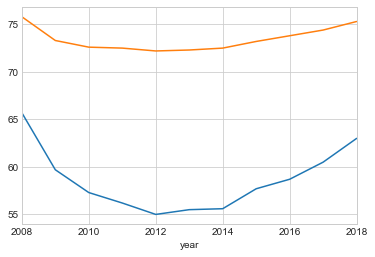

In [113]:
data_true.loc[data_true['area'] == 'Region Hovedstaden', :].plot(x='year',y={'emp_nw','emp'},legend=False);

In [ ]:
#Procentvis stigning og fald i employment rate og indkomst.

# # The income variable is funky.

PÅ trods af at income variablen har forskellige uddannelsesniveauer, så kan jeg kun se disponibel indkomst for *10 BASIC SCHOOL 8-10 grade'. Indkomst variablen viser altså disponibel indkomst (totalt) for uddannelses niveau BASIC school. Og den er faldende over tid.

In [119]:
#PLotting income. 
import ipywidgets as widgets
def plot_data_true(df, area): 
    I = df['area'] == area
    ax=df.loc[I,:].plot(x='year', y='income', style='-o', legend=False)

In [120]:
widgets.interact(plot_data_true, 
    df = widgets.fixed(data_true),
    area = widgets.Dropdown(description='area', 
                                    options=data.area.unique(), 
                                    value='Region Hovedstaden')
); 

interactive(children=(Dropdown(description='area', index=3, options=('Region Midtjylland', 'Region Nordjylland…

In [73]:
tables = dst.get_tables(subjects=['04'])
tables[tables.id == 'INDKP107']
indk_vars = dst.get_variables(table_id='INDKP107')
indk_vars
inc2 = dst.get_data(table_id = 'INDKP107', variables= {'OMRÅDE':['*'], 'TID':['*'],'KOEN':['*']})
inc2.head()

,OMRÅDE,TID,KOEN,ENHED,UDDNIV,INDKOMSTTYPE,INDHOLD
0,Region Syddanmark,2013,Men,People with type of income (number),10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),158590
1,Region Syddanmark,2013,Women,People with type of income (number),10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),175138
2,Region Syddanmark,2013,"Men and women, total",People with type of income (number),10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),333728
3,Copenhagen,2013,Men,People with type of income (number),10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),49574
4,Copenhagen,2013,Women,People with type of income (number),10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),47114


In [74]:
columns_dict_inc = {}
columns_dict_inc['OMRÅDE'] = 'area'
columns_dict_inc['TID'] = 'year'
columns_dict_inc['INDHOLD'] = 'income'
columns_dict_inc['INDKOMSTTYPE'] = 'income_type'
columns_dict_inc['KOEN'] = 'gender'

inc2.rename(columns=columns_dict_inc,inplace=True)
inc2.head()



,area,year,gender,ENHED,UDDNIV,income_type,income
0,Region Syddanmark,2013,Men,People with type of income (number),10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),158590
1,Region Syddanmark,2013,Women,People with type of income (number),10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),175138
2,Region Syddanmark,2013,"Men and women, total",People with type of income (number),10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),333728
3,Copenhagen,2013,Men,People with type of income (number),10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),49574
4,Copenhagen,2013,Women,People with type of income (number),10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),47114


In [75]:
inc2.head()
I = inc2.area.str.contains('Region')
I |= inc2.gender.str.contains('total')
# I |= inc2.income_type.str.contains('1 Disposable income (2+30-31-32-35)')
inc2 =  inc2.loc[I,['area','year','income']]
inc2.head(10)

,area,year,income
0,Region Syddanmark,2013,158590
1,Region Syddanmark,2013,175138
2,Region Syddanmark,2013,333728
5,Copenhagen,2013,96688
8,Frederiksberg,2013,14135
11,Dragør,2013,2698
14,Tårnby,2013,10665
18,Vallensbæk,2013,2983
23,Morsø,2013,7527
26,Thisted,2013,14231
